In [2]:
from __future__ import print_function, division   # Ensures Python3 printing & division standard
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.colors import LogNorm
import numpy as np
import h5py
import csv
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.colors import LogNorm
import numpy as np
import csv
import pandas as pd 
from functions import *
from pandas import Series, DataFrame 
import time
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [3]:
r = np.random
r.seed(42)

SavePlots = False
plt.close('all')

In [4]:
def load_data(name):
    with h5py.File(f'{name}.h5', 'r') as f:
        filename = name.split('/')[1]
        return pd.DataFrame(f[filename][:], dtype=np.float64)

train = load_data('data/train')
test  = load_data('data/test')

print (f'Shape of training data set: {train.shape}')
print (f'Shape of test data set: {test.shape}')

all_variables = ['actualInteractionsPerCrossing', 'averageInteractionsPerCrossing', 'correctedActualMu', 'correctedAverageMu', 'correctedScaledActualMu',
                 'correctedScaledAverageMu', 'NvtxReco', 'p_nTracks', 'p_pt_track', 'p_eta', 'p_phi', 'p_charge', 'p_qOverP', 'p_z0', 'p_d0', 'p_sigmad0',
                 'p_d0Sig', 'p_EptRatio', 'p_dPOverP', 'p_z0theta', 'p_etaCluster', 'p_phiCluster', 'p_eCluster', 'p_rawEtaCluster', 'p_rawPhiCluster',
                 'p_rawECluster', 'p_eClusterLr0', 'p_eClusterLr1', 'p_eClusterLr2', 'p_eClusterLr3', 'p_etaClusterLr1', 'p_etaClusterLr2', 'p_phiClusterLr2',
                 'p_eAccCluster', 'p_f0Cluster', 'p_etaCalo', 'p_phiCalo', 'p_eTileGap3Cluster', 'p_cellIndexCluster', 'p_phiModCalo', 'p_etaModCalo', 'p_dPhiTH3',
                 'p_R12', 'p_fTG3', 'p_weta2', 'p_Reta', 'p_Rphi', 'p_Eratio', 'p_f1', 'p_f3', 'p_Rhad', 'p_Rhad1', 'p_deltaEta1', 'p_deltaPhiRescaled2',
                 'p_TRTPID', 'p_TRTTrackOccupancy', 'p_numberOfInnermostPixelHits', 'p_numberOfPixelHits', 'p_numberOfSCTHits', 'p_numberOfTRTHits',
                 'p_numberOfTRTXenonHits', 'p_chi2', 'p_ndof', 'p_SharedMuonTrack', 'p_E7x7_Lr2', 'p_E7x7_Lr3', 'p_E_Lr0_HiG', 'p_E_Lr0_LowG', 'p_E_Lr0_MedG',
                 'p_E_Lr1_HiG', 'p_E_Lr1_LowG', 'p_E_Lr1_MedG', 'p_E_Lr2_HiG', 'p_E_Lr2_LowG', 'p_E_Lr2_MedG', 'p_E_Lr3_HiG', 'p_E_Lr3_LowG', 'p_E_Lr3_MedG',
                 'p_ambiguityType', 'p_asy1', 'p_author', 'p_barys1', 'p_core57cellsEnergyCorrection', 'p_deltaEta0', 'p_deltaEta2', 'p_deltaEta3', 'p_deltaPhi0',
                 'p_deltaPhi1', 'p_deltaPhi2', 'p_deltaPhi3', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhiRescaled0', 'p_deltaPhiRescaled1', 'p_deltaPhiRescaled3',
                 'p_e1152', 'p_e132', 'p_e235', 'p_e255', 'p_e2ts1', 'p_ecore', 'p_emins1', 'p_etconeCorrBitset', 'p_ethad', 'p_ethad1', 'p_f1core', 'p_f3core',
                 'p_maxEcell_energy', 'p_maxEcell_gain', 'p_maxEcell_time', 'p_maxEcell_x', 'p_maxEcell_y', 'p_maxEcell_z', 'p_nCells_Lr0_HiG', 'p_nCells_Lr0_LowG',
                 'p_nCells_Lr0_MedG', 'p_nCells_Lr1_HiG', 'p_nCells_Lr1_LowG', 'p_nCells_Lr1_MedG', 'p_nCells_Lr2_HiG', 'p_nCells_Lr2_LowG', 'p_nCells_Lr2_MedG',
                 'p_nCells_Lr3_HiG', 'p_nCells_Lr3_LowG', 'p_nCells_Lr3_MedG', 'p_pos', 'p_pos7', 'p_poscs1', 'p_poscs2', 'p_ptconeCorrBitset',
                 'p_ptconecoreTrackPtrCorrection', 'p_r33over37allcalo', 'p_topoetconeCorrBitset', 'p_topoetconecoreConeEnergyCorrection',
                 'p_topoetconecoreConeSCEnergyCorrection', 'p_weta1', 'p_widths1', 'p_widths2', 'p_wtots1', 'p_e233', 'p_e237', 'p_e277', 'p_e2tsts1', 'p_ehad1',
                 'p_emaxs1', 'p_fracs1', 'p_DeltaE', 'p_E3x5_Lr0', 'p_E3x5_Lr1', 'p_E3x5_Lr2', 'p_E3x5_Lr3', 'p_E5x7_Lr0', 'p_E5x7_Lr1', 'p_E5x7_Lr2', 'p_E5x7_Lr3',
                 'p_E7x11_Lr0', 'p_E7x11_Lr1', 'p_E7x11_Lr2', 'p_E7x11_Lr3', 'p_E7x7_Lr0', 'p_E7x7_Lr1' ]

X_init = train[all_variables]
X = pd.DataFrame(preprocessing.normalize(X_init), columns = all_variables)
y = train['Truth']


print (f'Shape of X: {X.shape}')
print (f'Shape of y: {y.shape}')

amount_to_drop = 150000

index_dropping = np.arange(start = 0, stop = amount_to_drop, step = 1, dtype = 'int')

X_trimmed = X.drop(index_dropping)

y_trimmed = y.drop(index_dropping)

print (f'Shape of X_trimmed: {X_trimmed.shape}')
print (f'Shape of y_trimmed: {y_trimmed.shape}')

Shape of training data set: (162500, 166)
Shape of test data set: (160651, 164)
Shape of X: (162500, 160)
Shape of y: (162500,)
Shape of X_trimmed: (12500, 160)
Shape of y_trimmed: (12500,)


## Randomised Gridsearch to find optimal parameters

In [5]:
# start=time.time()
# mpl_init = MLPClassifier(max_iter=20000,
#                     n_iter_no_change=100,           # Number of iterations without improvement before stopping
#                     )


# parameter_space = {
#     'hidden_layer_sizes': [(50,50,50), (50,100,50)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05, 0.2],
#     'learning_rate': ['constant','adaptive', 'invscaling'],
# }

# clf_init = RandomizedSearchCV(mpl_init, parameter_space, n_jobs = -1, cv = 3)

# clf_init.fit(X_trimmed, y_trimmed)

# # Make predictions (NOTE: This "spits out" two columns!):
# y_score_MLP = clf_init.predict(X)

# # Print the time usage:
# end = time.time()
# print(f"Time used by MLPClassifier: {(end-start):.1f} s")

# # Best paramete set
# print('Best parameters found:\n', clf_init.best_params_)

# # All results
# means = clf_init.cv_results_['mean_test_score']
# stds = clf_init.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf_init.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

## Use the optimal settings from above to train a new one, without having to go through the randomised search

In [6]:
mpl = MLPClassifier(max_iter=20000,
                    n_iter_no_change=100,               # Number of iterations without improvement before stopping
                    solver='adam',                      # Standard for minimising
                    activation='relu',                  # Activation function
                    hidden_layer_sizes=(50, 50, 50),    # Number of neurons in each layer
                    learning_rate='adaptive',           # Learning rate
                    random_state=42,                    # Random state for reproducibility
                    alpha = 0.0001)                     # Regularization parameter       

clf = mpl.fit(X_trimmed, y_trimmed)

y_score_MLP = clf.predict(X)


Text(0, 0.5, 'True Positive Rate')

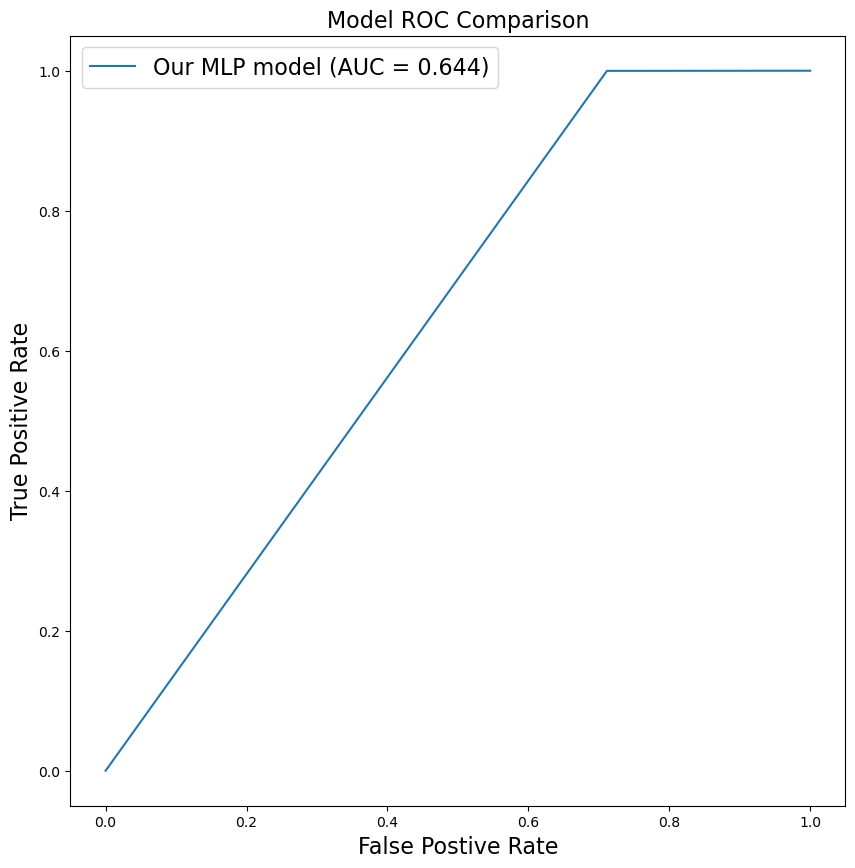

In [ ]:
# Evaluate:
fpr, tpr, _ = roc_curve(y, y_score_MLP)              # False/True Positive Rate for our model

# We can now calculate the AUC scores of these ROC-curves:
auc_score = auc(fpr,tpr)                        # This is the AUC score for our model

# Let's plot the ROC curves for these results:
fig = plt.figure(figsize = [10,10])
plt.title('Model ROC Comparison', size = 16)
plt.plot(fpr, tpr, label=f'Our MLP model (AUC = {auc_score:5.3f})')
plt.legend(fontsize=16)
plt.xlabel('False Postive Rate', size=16)
plt.ylabel('True Positive Rate', size=16)